In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
df =pd.read_csv("/content/TCGA_GBM_LGG_Mutations_all.csv", header=None, na_values="?")

In [ ]:
print(df.head)
print(df.isna().sum())

<bound method NDFrame.head of         0         1             2       3                  4   \
0    Grade   Project       Case_ID  Gender   Age_at_diagnosis   
1      LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
2      LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
3      LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
4      LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
..     ...       ...           ...     ...                ...   
858    GBM  TCGA-GBM  TCGA-19-5959  Female  77 years 325 days   
859    GBM  TCGA-GBM  TCGA-16-0846    Male   85 years 65 days   
860    GBM  TCGA-GBM  TCGA-28-1746  Female  77 years 178 days   
861    GBM  TCGA-GBM  TCGA-32-2491    Male  63 years 121 days   
862    GBM  TCGA-GBM  TCGA-06-2557    Male  76 years 221 days   

                          5                          6            7   \
0          Primary_Diagnosis                       Race         IDH1   
1     Oligodendroglioma, NOS                 

In [ ]:
print(df.columns)


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')


<Axes: xlabel='Grade', ylabel='Gender'>

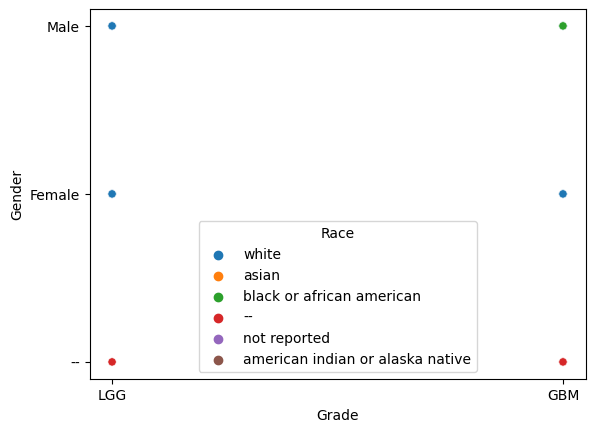

In [ ]:
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/TCGA_GBM_LGG_Mutations_all.csv")

# Plot a scatter plot of the data
sns.scatterplot(x="Grade", y="Gender", hue="Race", data=data)

In [ ]:
for i in range(0,27):
  df[i]=LabelEncoder().fit_transform(df[i])
df = df.drop([0])
print(df.head)

<bound method NDFrame.head of      0   1    2   3    4   5   6   7   8   9   ...  17  18  19  20  21  22  \
1     2   2  481   3  410   5   6   1   1   2  ...   1   1   2   2   2   1   
2     2   2  733   3  223   4   6   1   1   2  ...   2   1   2   2   2   1   
3     2   2  693   3  174   1   6   1   0   1  ...   2   1   2   2   2   1   
4     2   2  519   1  126   2   6   1   0   1  ...   2   1   2   2   2   1   
5     2   2  776   3  104   2   6   1   0   1  ...   2   1   2   2   2   1   
..   ..  ..  ...  ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
858   0   1  234   1  803   3   6   2   1   2  ...   2   1   2   2   2   1   
859   0   1  197   3  831   3   6   2   0   2  ...   2   1   2   2   2   1   
860   0   1  267   1  802   3   6   2   0   2  ...   2   1   2   2   2   1   
861   0   1  301   3  632   3   6   2   0   2  ...   2   0   2   2   2   1   
862   0   1   80   3  792   3   4   2   1   2  ...   2   1   2   2   2   1   

     23  24  25  26  
1     2   2

In [ ]:
target=df[1]
data=df.drop(columns=[1,0])
print(target.shape, data.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data,target,test_size=0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(862,) (862, 25)
(258, 25) (604, 25) (258,) (604,)


In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron()

In [ ]:
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Accuracy for training: ", accuracy_score(pred_train,y_train))
print("Accuracy for testing: ", accuracy_score(pred_test,y_test))

Accuracy for training:  0.9457364341085271
Accuracy for testing:  0.9188741721854304


In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Accuracy for training: ", accuracy_score(pred_train,y_train))
print("Accuracy for testing: ", accuracy_score(pred_test,y_test))

Accuracy for training:  0.9961240310077519
Accuracy for testing:  0.9850993377483444


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

training accuracy :  1.0
testing accuracy :  0.9933774834437086


[Text(0.5, 0.75, 'x[0] <= 359.0\nentropy = 0.983\nsamples = 258\nvalue = [109, 149]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 149\nvalue = [0, 149]')]

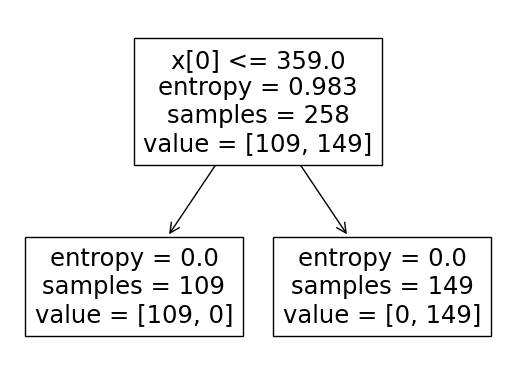

In [ ]:
model_dt=DecisionTreeClassifier(criterion="entropy",max_depth=4).fit(x_train,y_train)
train_pred = model_dt.predict(x_train)
test_pred = model_dt.predict(x_test)
print("training accuracy : ",accuracy_score(train_pred,y_train))
print("testing accuracy : ",accuracy_score(test_pred,y_test))
plot_tree(model_dt)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

In [ ]:
model = SVC()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("training accuracy is : ", accuracy_score(train_pred,y_train))
print("testing accuracy is : ", accuracy_score(test_pred,y_test))

training accuracy is :  0.9844961240310077
testing accuracy is :  0.9751655629139073


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for k in range(1,10):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  train_pred=model.predict(x_train)
  test_pred=model.predict(x_test)
  print("training accuracy for k = ",k, " is ",accuracy_score(train_pred,y_train))
  print("testing accuracy for  k = ",k," is ", accuracy_score(test_pred,y_test))


training accuracy for k =  1  is  1.0
testing accuracy for  k =  1  is  0.9784768211920529
training accuracy for k =  2  is  1.0
testing accuracy for  k =  2  is  0.9784768211920529
training accuracy for k =  3  is  0.9961240310077519
testing accuracy for  k =  3  is  0.9735099337748344
training accuracy for k =  4  is  0.9806201550387597
testing accuracy for  k =  4  is  0.9735099337748344
training accuracy for k =  5  is  0.9883720930232558
testing accuracy for  k =  5  is  0.9784768211920529
training accuracy for k =  6  is  0.9844961240310077
testing accuracy for  k =  6  is  0.9751655629139073
training accuracy for k =  7  is  0.9883720930232558
testing accuracy for  k =  7  is  0.9768211920529801
training accuracy for k =  8  is  0.9922480620155039
testing accuracy for  k =  8  is  0.9751655629139073
training accuracy for k =  9  is  0.9806201550387597
testing accuracy for  k =  9  is  0.9701986754966887


In [ ]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV
svc_model = svm.SVC(verbose = False)
from sklearn.model_selection import GridSearchCV
def print_results(df_output):
    df_results = df_output[['params', 'mean_train_score','mean_test_score', 'rank_test_score']]
    df_results.sort_values(by = 'rank_test_score').head(5)
    return df_results.sort_values(by = 'mean_test_score', ascending = False).head(5)

grid_search = GridSearchCV(svc_model, param_grid = {
                'kernel' : ['linear', 'rbf', 'poly'],
                'degree' : [2,3,4,5,6],
                'C' : [1,2,5]
            }, 
            cv = 5, return_train_score = True)


grid_search.fit(x_train, y_train)
print_results(pd.DataFrame(grid_search.cv_results_))

,params,mean_train_score,mean_test_score,rank_test_score
17,"{'C': 2, 'degree': 2, 'kernel': 'poly'}",0.991281,0.992232,1
32,"{'C': 5, 'degree': 2, 'kernel': 'poly'}",0.993213,0.992232,1
0,"{'C': 1, 'degree': 2, 'kernel': 'linear'}",1.000000,0.992157,3
24,"{'C': 2, 'degree': 5, 'kernel': 'linear'}",1.000000,0.992157,3
21,"{'C': 2, 'degree': 4, 'kernel': 'linear'}",1.000000,0.992157,3


In [ ]:
svc_model = svm.SVC(C = 5, degree= 6, kernel= 'linear')
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

0.9900662251655629